In [1]:
#: the usual imports
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

def normal_curve(x, mu=0, sigma=1):
    return 1 / np.sqrt(2*np.pi) * np.exp(-(x - mu)**2/(2 * sigma**2))

def plot_sample_mean(sample_size):
    sample = flights.sample(sample_size).column('Delay')

    fig, ax1 = plt.subplots()
    plt.xlim([-10, 80])
    plt.grid('off')
    ax1.hist(sample, density=True, bins=np.arange(0, 200, 5), label='Sample')
    ax2 = ax1.twinx()
    plot_clt_curve(sample_size)
    ax1.set_ylim([-.0, .055])
    ax2.set_ylim([-.01, .5])

    plt.scatter(sample.mean(), 0, marker='^', color='C1', s=200, label='Sample Mean')
    plt.legend(loc='upper right')

plt.style.use('fivethirtyeight')

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
   "livereveal", {
       'width': 1200,
       'height': 700,
       "scroll": True,
})

{'width': 1200, 'height': 700, 'scroll': True}

In [1]:
a=10
a+'a'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

# Day 9 - Central Limit Theorem and Normal Confidence Intervals

## The Central Limit Theorem

> The distribution of sums (and averages) of large random samples (w/ replacement) are roughly normal, regardless of the distribution of the population from which the sample was drawn

## The shape of the distribution

- CLT: Averages of random samples are roughly normal.
- Centered at population mean.
    - Sample mean is an unbiased estimator of the population mean.
- What is the spread of the distribution?

## The spread of the distribution

Suppose we take a large random sample of flights from our flight delay dataset and compute the mean flight delay. The distribution of the sample mean will be bell-shaped and centered at the population mean, by the CLT.

If we increase the sample size (take larger samples), the distribution of the sample mean will have  
- A. higher SD  
- B. lower SD  
- C. the same SD

In [6]:
#: draw `sample_size` flights, compute mean, `repetitions` many times
def sample_mean_delays(sample_size, repetitions=2000):
    sample_means = make_array()
    for i in np.arange(repetitions):
        sample = flights.sample(sample_size)
        sample_mean = sample.column('Delay').mean()
        sample_means = np.append(sample_means, sample_mean)
    return sample_means

In [7]:
#: repeat the experiment for various sample sizes
flights = Table.read_table('./united_summer2015.csv')

sample_means = {}
sample_sizes = [1, 4, 16, 64, 100, 900, 1600]

for size in sample_sizes:
    sample_means[size] = sample_mean_delays(size)

SD of The Population: 34.87186926702134
Sample Size: 1
SD of This Distribution (Sample Mean): 36.617546746744246
Sample Size: 4
SD of This Distribution (Sample Mean): 17.923454877617765
Sample Size: 16
SD of This Distribution (Sample Mean): 8.857294052564459
Sample Size: 64
SD of This Distribution (Sample Mean): 4.294644645576034
Sample Size: 100
SD of This Distribution (Sample Mean): 3.569656952579617
Sample Size: 900
SD of This Distribution (Sample Mean): 1.1855186927388928
Sample Size: 1600
SD of This Distribution (Sample Mean): 0.8739697947440188


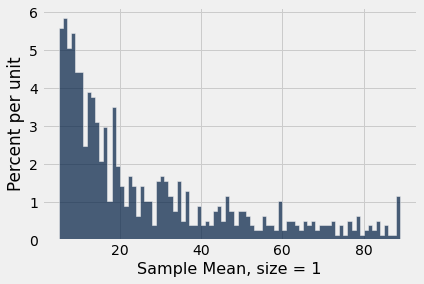

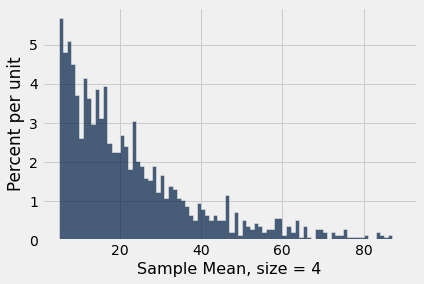

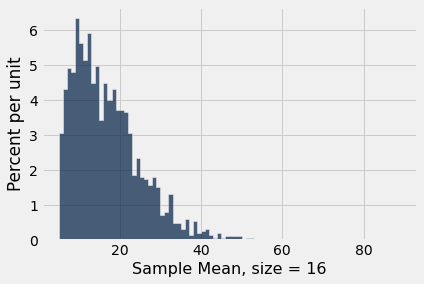

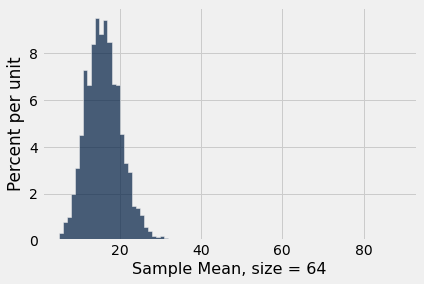

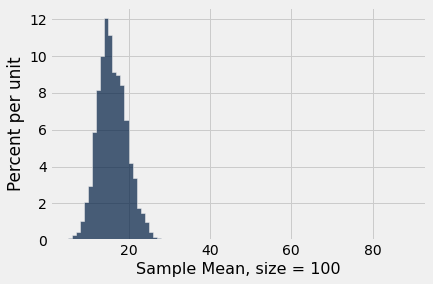

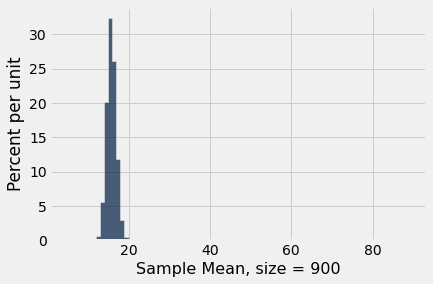

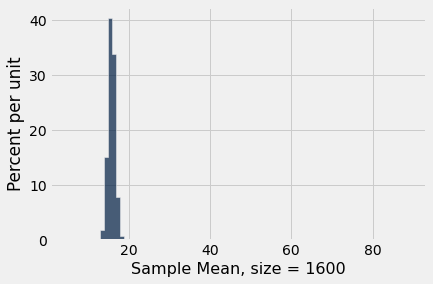

In [8]:
#: plot the distributions
print("SD of The Population:", np.std(flights.column('Delay')))
bins = np.arange(5, 90)
for size in sample_sizes:
    Table().with_column(
        f'Sample Mean, size = {size}',
        sample_means[size]
    ).hist(bins=bins)
    print("Sample Size:", size)
    print("SD of This Distribution (Sample Mean):", np.std(sample_means[size]))

## CLT for the sample mean

- Sample mean of random samples is distributed normally.
- Centered at population mean.
- Standard deviation is:
$$
    \frac{
        \text{population standard dev.}
    }{
        \sqrt{\text{sample size}}
    }
$$

In [9]:
observed = Table().with_columns('Sample Size', sample_sizes, 
                                'Sample Means', [np.mean(sample_means[i]) for i in sample_sizes])
observed

Sample Size,Sample Means
1,15.8705
4,16.0845
16,15.6148
64,15.9059
100,15.886
900,15.7777
1600,15.8389


In [12]:
#: clt's prediction
def clt_standard_deviation(n):
    sigma = flights.column('Delay').std()
    return sigma / np.sqrt(n)

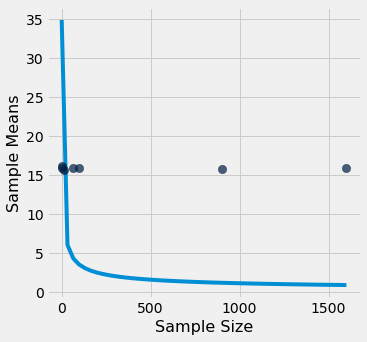

In [15]:
#: plot prediction and observed
observed.scatter('Sample Size', s=70, zorder=2)
x = np.linspace(1, 1600)
y = clt_standard_deviation(x)
plt.plot(x, y, zorder=1)

## Recap

- We want to find population mean.
- But we only have one sample.
- Hope that sample mean is close to population mean.
- But it could have been different.

## Recap

- We can run bootstrap, or (sometimes) draw more samples to approximate sampling distribution.
- But CLT says that it is normal.
- Centered at population mean.
- Standard deviation is:
$$
    \frac{
        \text{population standard dev.}
    }{
        \sqrt{\text{sample size}}
    }
$$

## Three Distributions

Suppose we draw a sample of flights and find the mean flight delay.

Three distributions are involved:

- The population (we don't see this)
- The sample (we see this)
- Distribution of the sample mean (we don't see this directly)
    - a.k.a, sampling distribution of mean
    - a.k.a, empirical distribution of sample mean

## The population (we don't see this)

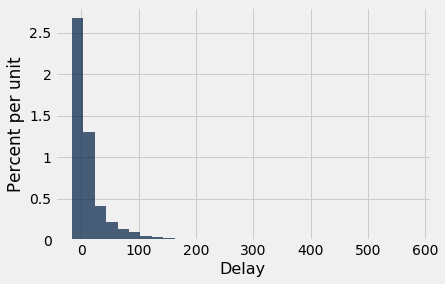

In [7]:
flights = Table.read_table('./united_summer2015.csv')
flights.hist('Delay', bins=30)

## The population

- We don't see:
    - the population distribution,
    - the population mean (fixed!),
    - the population standard deviation (fixed!).

## The sample (we see this)

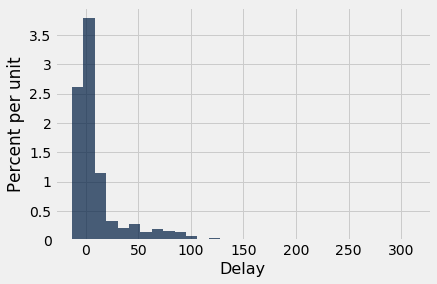

In [8]:
flights.sample(400).hist('Delay', bins=30)

## The sample

- We *do* see (or can calculate):
    - the sample itself (random!),
    - the sample's mean (random!),
    - the sample's standard deviation (random!).

## Distribution of the sample mean (we don't see this directly)

- We don't see it, but the **Central Limit Theorem** tells us what it should look like:
    - Normally distributed
    - Centered at population mean (fixed, unobserved).
    - Standard deviation (fixed, unobserved):
$$\frac{\text{population standard dev.}}{\sqrt{\text{sample size}}}$$

# Normal Confidence Intervals

## Normal confidence intervals

- We used bootstrapping to construct confidence intervals.
- But we can often use the CLT.
    - Computationally cheaper!
    
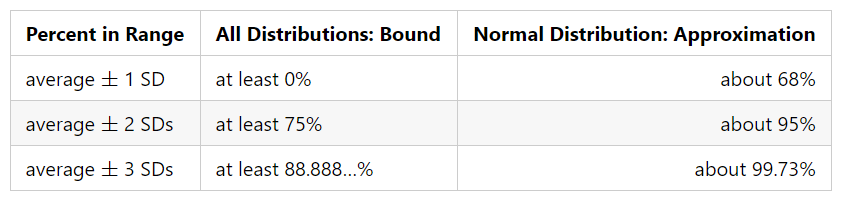

# Experiment Design

## Example: Polling

- You are conducting a campus poll:
    - Yes/No: Does Fudon University exist?
- You want to estimate the proportion in population who believe "Yes".
- Need to be accurate to within $\pm$ 0.03, 95% of the time.
- i.e., your 95% confidence interval should be 0.06 wide.
- How big of a sample do you need?

## Proportions are just means

- When polling, we'll write 1 if a person answers "Yes", 0 otherwise.
- The sample proportion who think Fudon Univ exists = mean of 0's and 1's
- I.e., it is the mean of random sample.
- Hence the CLT applies.

In [16]:
a = make_array(0, 1, 1, 1, 0)
a.mean()

0.6

## Our strategy

1. We will poll a random sample of $n$ people
2. Compute sample mean (i.e., proportion who believe Fudon exists)
3. Compute sample standard deviation
4. Construct 95% confidence interval:
$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{\text{n}}},   
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{\text{n}}}
\right]
$$

## Our strategy

- We want a CI whose width is 0.06 or less.
- The width of our confidence interval depends on two things:
    - sample SD
    - sample size, $n$
- If we know SD, we can pick $n$ to make CI the right size.
- But before polling, we don't know the sample SD (we don't have a sample!)

## Bounding the sample SD

- How big could the sample SD be?
- This is a simple calculation, but...
- Let's try to get the answer from a plot.

## Create a sample of zeros and ones

In [17]:
#: construct an array of zeros/ones
def polling_sample(size, number_of_ones):
    count = np.arange(size)
    return np.where(count < number_of_ones, 1, 0)

In [18]:
polling_sample(10, 6)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [19]:
np.std(polling_sample(10, 6))

0.4898979485566356

## Compute standard deviations

In [20]:
#: compute SD for each proportion
size = 100
proportions = np.arange(0, size+1, 10)
sds = make_array()

for proportion in proportions:
    population = polling_sample(size, proportion)
    sd = np.std(population)
    sds = np.append(sds, sd)

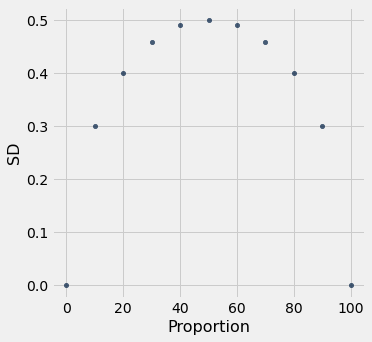

In [21]:
Table().with_columns(
    'Proportion', proportions,
    'SD', sds
).scatter('Proportion')

## Bounding the sample SD

- The most the sample SD can be is 0.5.
- Doesn't depend on size of sample.
- True for the population, too!
- Using 0.5 in place of sample SD results in a conservative confidence interval.

## Constructing the 95% confidence interval

- The interval is:

$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{n}},
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

- The width is:

$$
4 \cdot \frac{\text{sample SD}}{\sqrt{n}}
$$

- Use 0.5 instead of sample SD:

$$
4 \cdot \frac{0.5}{\sqrt{n}} = \frac{2}{\sqrt{n}}
$$

## Constructing the 95% confidence interval

- Upper bound on CI width: $$\text{width} = \frac{2}{\sqrt{n}}$$
- Want our sample mean to be within $\pm$ 0.03.
- I.e., want our CI width to be smaller than 0.06.
- Solve for $n$:

$$
\sqrt{n} = \frac{2}{\text{width}} = \frac{2}{0.06}
$$

In [80]:
(2/.06)**2

1111.1111111111113

## Answer

- We must poll $\approx$ 1111 people to get a 95% CI which is 0.06 wide.

## Discussion question

We must poll 1111 people to get a 95% CI which is 0.06 wide.
Suppose we instead want a CI that is 0.03 wide. How many people do we need to poll?

- A) 555
- B) 2222
- C) 4444
- D) 8888

## Answer: the $\sqrt{\quad}$ rule

- We need 4444 samples.
- To double our accuracy, we must *quadruple* our sample size.

In [31]:
sample_size = 200
result = make_array()
for i in np.arange(500):
    data = np.where(np.random.uniform(0, 1, sample_size) > np.random.uniform(0, 1, 1), 1, 0)
    result = np.append(result, 4 * np.std(data)/ np.sqrt(sample_size))

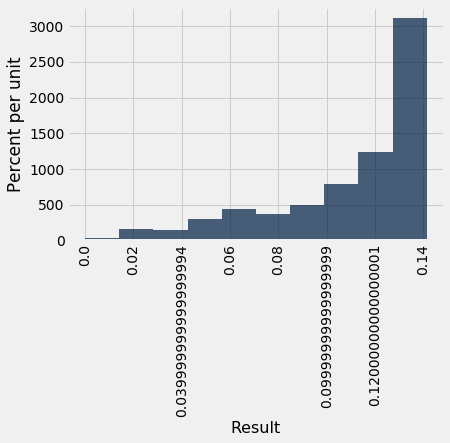

In [32]:
Table().with_column('Result', result).hist(0)

In [33]:
help(np.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are